<a href="https://colab.research.google.com/github/TheClassicTechno/FastFourierTransform/blob/main/Real_Sounds_Fourier_Transform_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fourier Transform
 Julia Huang

In the [previous tutorial](https://colab.research.google.com/github/jinglescode/python-signal-processing/blob/main/tutorials/Signal%20composition%20-%20time%2C%20sampling%20rate%20and%20frequency.ipynb), we learned that combining multiple signals will produce a new signal where all the frequencies are jumbled up. In this tutorial, we will learn about Fourier Transform and how it can take a complex signal and decompose it to the frequencies that made it up.



FFT converts a signal into individual spectral components and thereby provides frequency information about the signal. convert a digital signal (x) with length (N) from the time domain into a signal in the frequency domain (X)

440 Hz ( oscillations/beats per second)

FFT decompose into indiv frequencies that make up whole signal

https://www.sciencedirect.com/topics/engineering/fast-fourier-transform
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html 

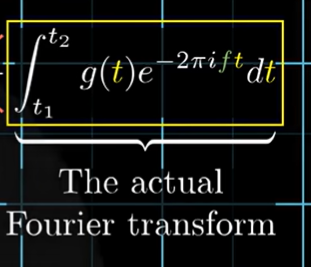

## Load packages

We will download [splearn](https://github.com/jinglescode/python-signal-processing), a package that consists of datasets, common signal processing functions and machine learning model architectures.

In [1]:
#@title 
!git clone https://github.com/jinglescode/python-signal-processing.git
%cd python-signal-processing
!pip install -r requirements.txt --quiet

Cloning into 'python-signal-processing'...
remote: Enumerating objects: 465, done.
remote: Counting objects: 100% (465/465), done.
remote: Compressing objects: 100% (317/317), done.
remote: Total 465 (delta 258), reused 314 (delta 127), pack-reused 0
Receiving objects: 100% (465/465), 22.40 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (258/258), done.
/content/python-signal-processing
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
#@title 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import IPython.display as ipd

from splearn.data.generate import generate_signal # https://github.com/jinglescode/python-signal-processing/blob/main/splearn/data/generate.py
from splearn.fourier import fast_fourier_transform # https://github.com/jinglescode/python-signal-processing/blob/main/splearn/fourier.py

sampling_rate = 8000

## What is Fourier transform?

Fourier transform, this is the definition taken from Wikipedia:

> Fourier transform is a mathematical transform that decomposes a function (often a function of time or a signal) into its constituent frequencies.

What does this mean? 

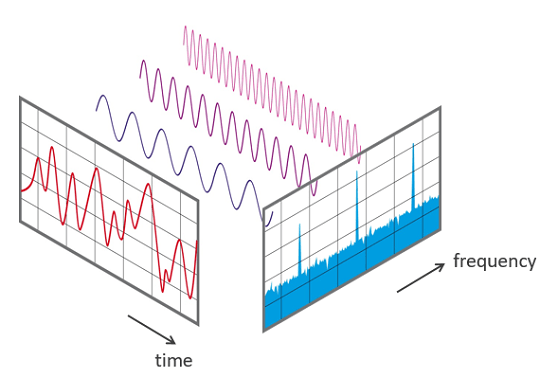

Essentially, Fourier transform converts the domain of time into the domain of frequencies.


To understand this, we can illustrate with a piano. Each key on the piano generates a unique sound wave when the hammer hits the strings based on the strings' thickness and tension. Each key sounds different because each key on the piano has a unique frequency. 

For example, when we play the C-major chord, it is made up of three notes, C, E, and G. If we look up for the [frequencies of these keys](https://en.wikipedia.org/wiki/Piano_key_frequencies), we get 262 Hz (C), 330 Hz (E), and 392 Hz (G). Each key will generate a signal, the frequency represents the pitch, and the amplitude represents the loudness (how hard you hit the keys). 

#what does dpi mean? @@

Illustrate C note:


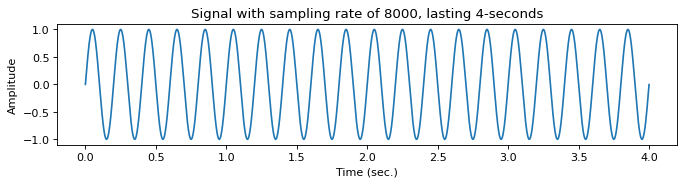

Illustrate E note:


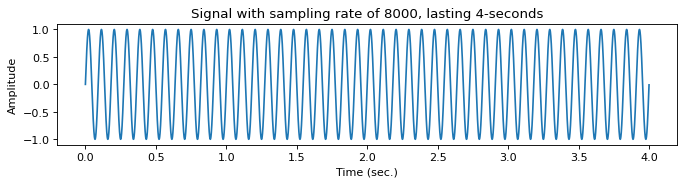

Illustrate G note:


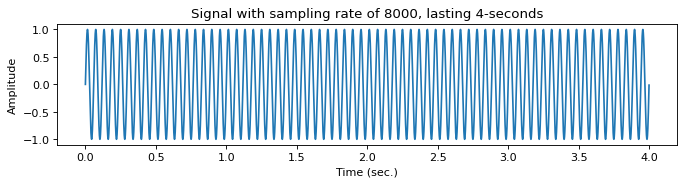

In [3]:
#@title 

# frequencies are replaced so that we can visualize the differences for illustration

print("Illustrate C note:")
figure(num=None, figsize=(10, 2), dpi=80, facecolor='w', edgecolor='k')
s1 = generate_signal(
    length_seconds=4, 
    sampling_rate=sampling_rate, 
    frequencies=[5], #high vs low freq
    plot=True
)

plt.show()

print('Illustrate E note:')
figure(num=None, figsize=(10, 2), dpi=80, facecolor='w', edgecolor='k')
s1 = generate_signal(
    length_seconds=4, 
    sampling_rate=sampling_rate, 
    frequencies=[11],
    plot=True
)
plt.show()

print('Illustrate G note:')
figure(num=None, figsize=(10, 2), dpi=80, facecolor='w', edgecolor='k')
s1 = generate_signal(
    length_seconds=4, 
    sampling_rate=sampling_rate, 
    frequencies=[17],
    plot=True
)
plt.show()

When we combine multiple signals, it is essentially a sum of all the signals (s1 + s2 + s3). So let's go ahead and generate a 4-seconds sound wave containing these frequencies. We will use a sampling rate of 8 kHz; it is the telephone audio sampling rate.

C-major chord, a signal consisting of 262 Hz (C), 330 Hz (E), and 392 Hz (G):


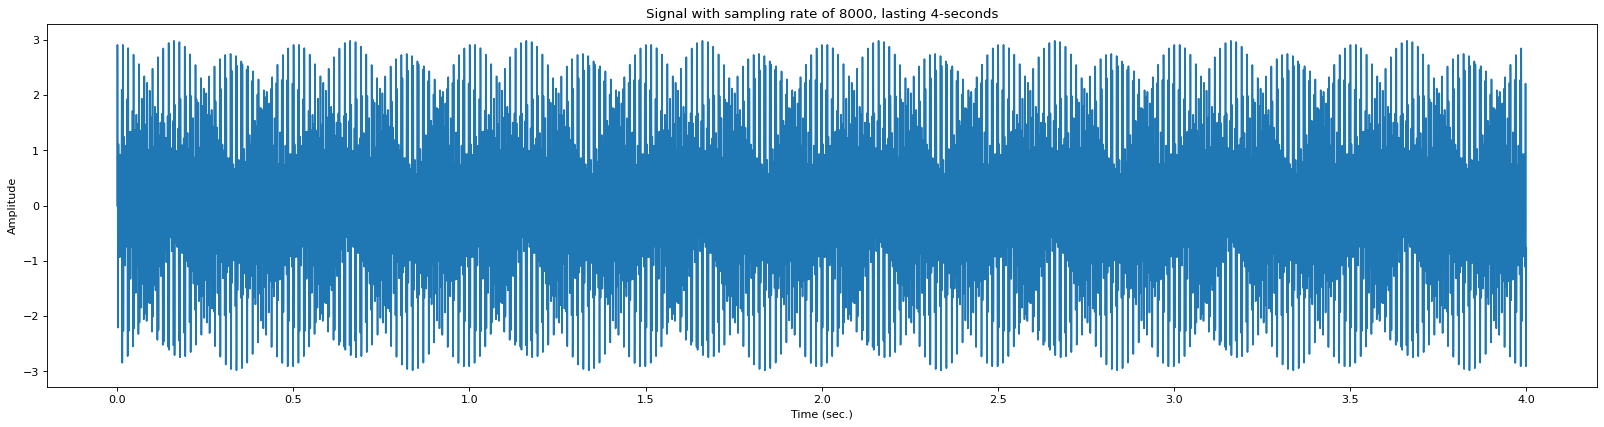

In [4]:
print('C-major chord, a signal consisting of 262 Hz (C), 330 Hz (E), and 392 Hz (G):')

figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
s1 = generate_signal(
    length_seconds=4, 
    sampling_rate=sampling_rate, 
    frequencies=[262, 330, 392], #different frequencies correspond to different musical notes 162 is lower E for example
    plot=True
)

As we have expected, we get a signal; it looks kinda pretty because there is no noise and they start at the same time. Let's listen to see how it sounds like.

In [5]:
ipd.Audio(s1, rate=sampling_rate)

WITHOUT NOISE: Signal in frequency domain after performing FFT:


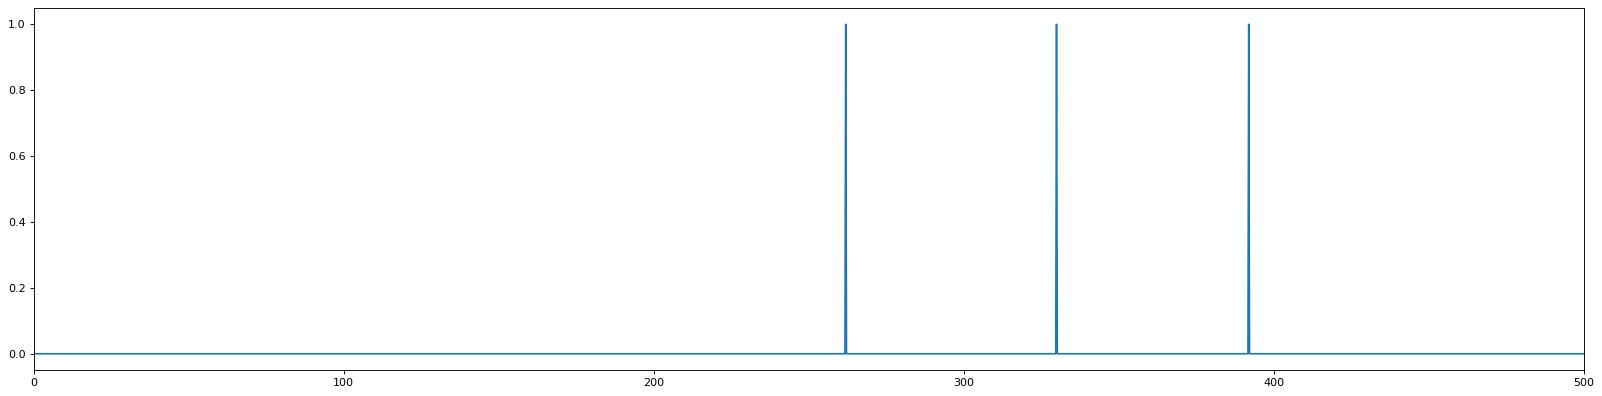

In [6]:
print('WITHOUT NOISE: Signal in frequency domain after performing FFT:')

figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
s2 = fast_fourier_transform(
    signal=s1, 
    sampling_rate=sampling_rate, 
    plot=True, 
    plot_xlim=[0, 500], 
)


It doesn't sound like the C-major chord, but we can still use this for our learning. Since we are at it, let's include random noise into the signal to mimic that our microphone has picked some background noise.

C-major chord, with static noise


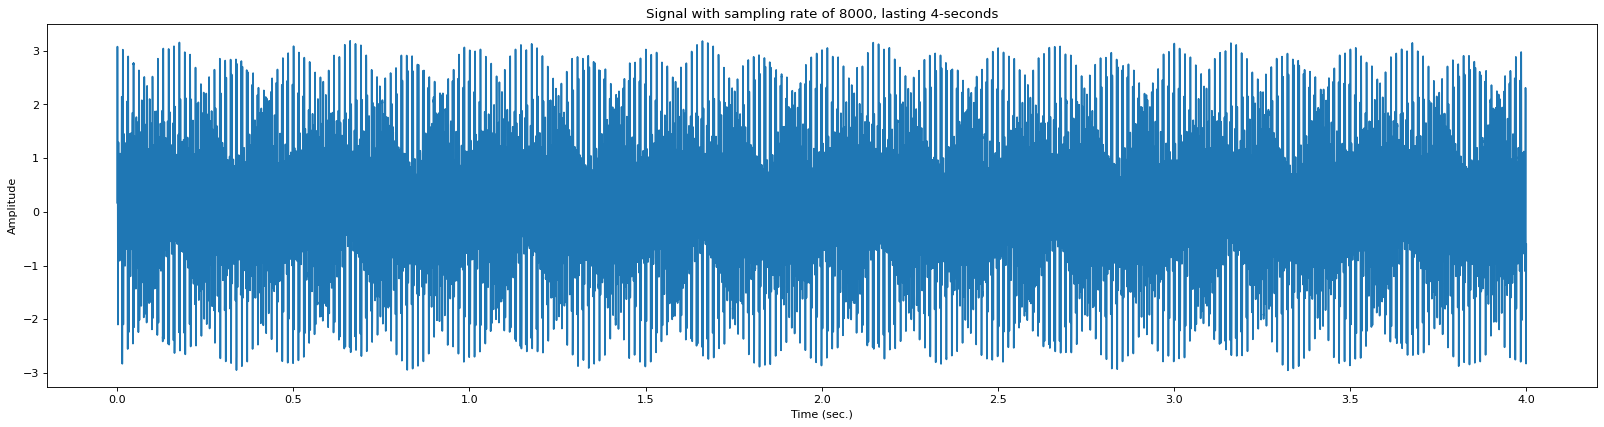

In [7]:
print('C-major chord, with static noise')

figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
s11 = generate_signal(
    length_seconds=4, 
    sampling_rate=sampling_rate, 
    frequencies=[262, 330, 392],
    add_noise=0.23, #higher # = more static
    plot=True
)

ipd.Audio(s11, rate=sampling_rate)

There we go, a sound wave containing our selected frequencies and noisy static sound. We have different frequencies mixed together, it is difficult to identify the frequency components by looking at the signal, can we identify and recover the three frequencies in this signal?

In [8]:
s11 #just array of numbers

array([ 0.1689554 ,  0.88240946,  1.62412005, ..., -1.86393143,
       -1.31435063, -0.60721602])

## Decomposes signal into frequencies

We can apply Fourier transform to decompose this signal and identify all the frequencies that are buried in this signal, especially the three frequencies (262 Hz, 330 Hz, and 392 Hz) we have selected to generate this signal.

WITH NOISE: Signal in frequency domain after performing FFT:


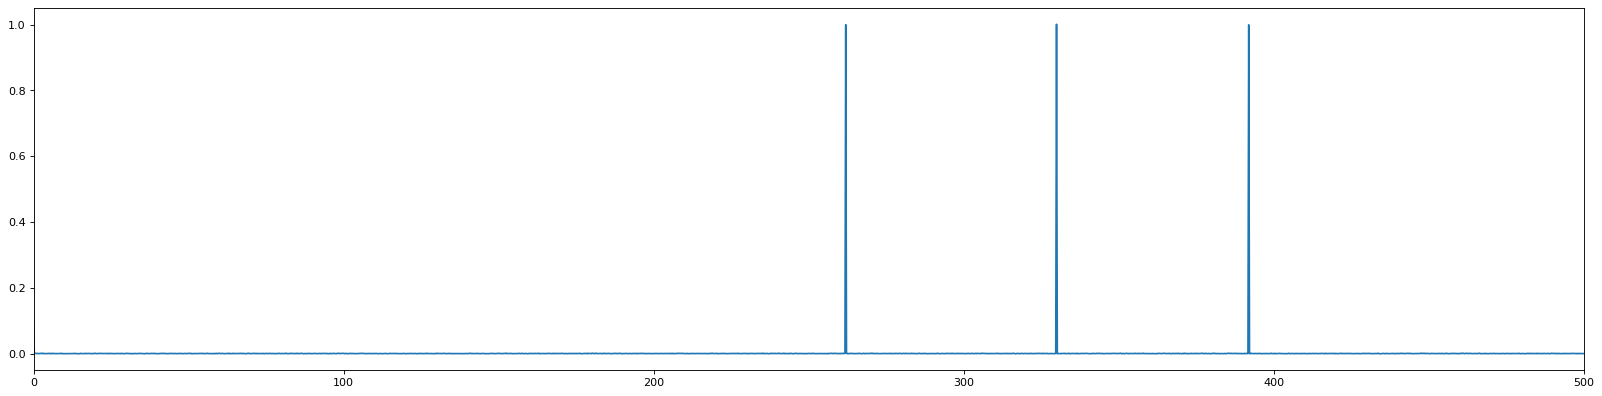

In [9]:
print('WITH NOISE: Signal in frequency domain after performing FFT:')

figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
s2 = fast_fourier_transform(
    signal=s11, 
    sampling_rate=sampling_rate, 
    plot=True, 
    plot_xlim=[0, 500], 
)


#above graph: x axes are the freq Hz. very clean! straight up and down lines even with noise.

Here we plot a chart showing each frequency's amplitude in the signal, where the x-axis represents each frequency (showing from 0 Hz to 500 Hz), and the y-axis is the amplitude. You can click on the graph to zoom in.

Despite the noisy background, we can clearly identify that there are three distinct frequencies in this signal. This technique can also work if you record a chord with your phone and upload it; Fourier transform can identify prominent frequencies. 

#Testing Fourier transform with custom sounds uploaded

In [10]:
import matplotlib.pyplot as plt 
import IPython.display as ipd
import librosa
import librosa.display

import numpy as np 
import pandas as pd

##a song

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


sample_rate :  48000
data :  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5258789e-05 1.5258789e-05
 0.0000000e+00]


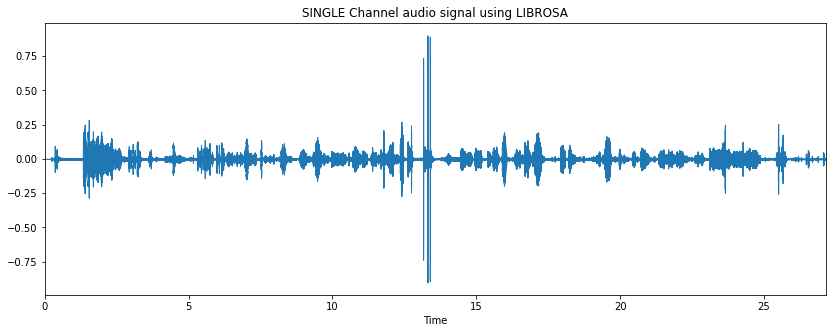

In [12]:
#filename = "theyearningcolab.wav"
filename = "/content/blankspacepart.m4a"
plt.figure(figsize = (14,5))



sound_data, sample_rate = librosa.load(filename, sr=None) # Load file to find data and sr(how many times per sec sound sample)
print("sample_rate : ",sample_rate)
print("data : ",sound_data)

librosa.display.waveplot(sound_data, sr = sample_rate) # Plotting audio file
plt.title("SINGLE Channel audio signal using LIBROSA")
ipd.Audio(filename) # play the audio

In [13]:
sample_rate

48000

#is y axis above the amplitude too?@@

#whats wrong with the below graph?@@ amplitude very small, frequencies very low too
#why does inc  the plot_xlim make the graph thicker lines (more lines)?

Signal of Blank Space in frequency domain after performing FFT:


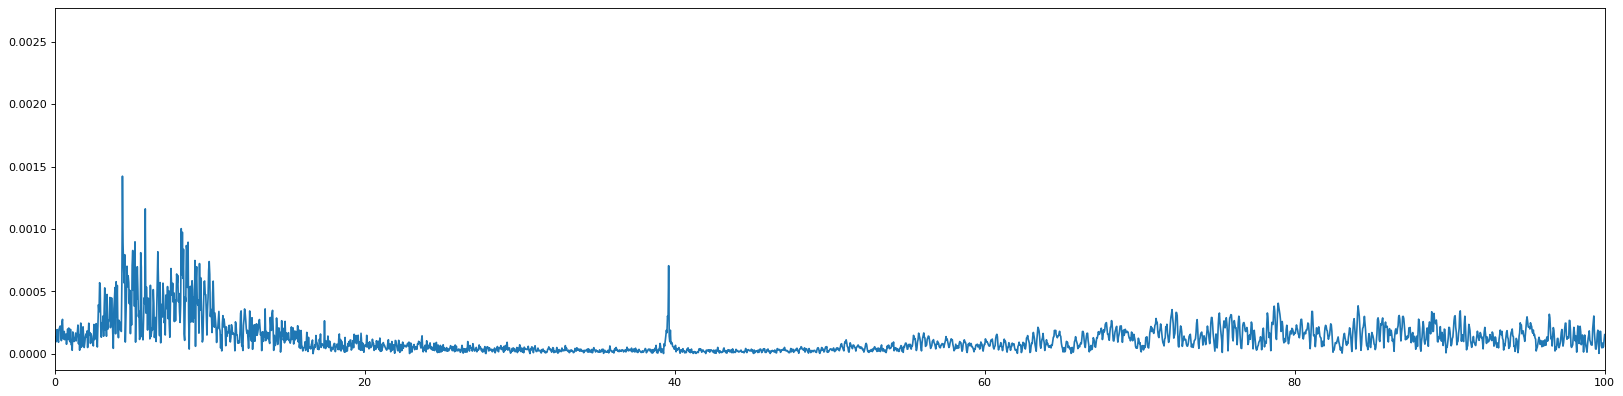

In [14]:
print('Signal of Blank Space in frequency domain after performing FFT:')

figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
s3 = fast_fourier_transform(
    signal=sound_data, 
    sampling_rate=sample_rate, 
    plot=True, 
    plot_xlim=[0, 100], 
)


Sampling rate or sampling frequency defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal.

##a tap

sample_rate :  48000
data :  [0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


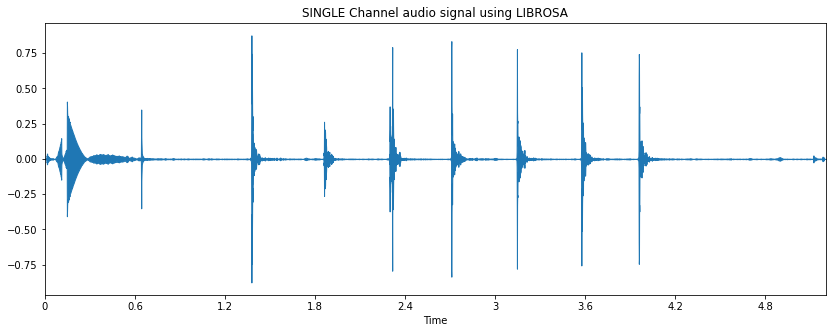

In [17]:
#filename = "theyearningcolab.wav"
filename2 = "/content/taps.m4a"
plt.figure(figsize = (14,5))



sound_data2, sample_rate = librosa.load(filename2, sr=None) # Load file to find data and sr(how many times per sec sound sample)
print("sample_rate : ",sample_rate)
print("data : ",sound_data2)

librosa.display.waveplot(sound_data2, sr = sample_rate) # Plotting audio file
plt.title("SINGLE Channel audio signal using LIBROSA")
ipd.Audio(filename2) # play the audio

#why simple tap also cause complex FFT graph?@@

Signal of tap in frequency domain after performing FFT:


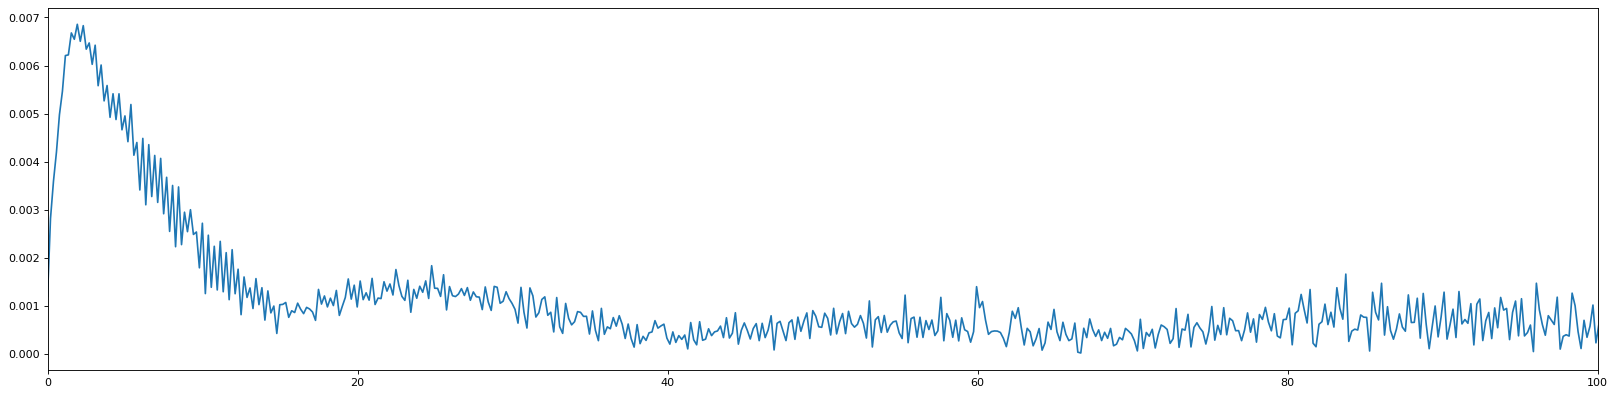

In [18]:
print('Signal of tap in frequency domain after performing FFT:')

figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
s3 = fast_fourier_transform(
    signal=sound_data2, 
    sampling_rate=sample_rate, 
    plot=True, 
    plot_xlim=[0, 100], 
)


#garageband piano notes

sample_rate :  48000
data :  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 4.5776367e-05]


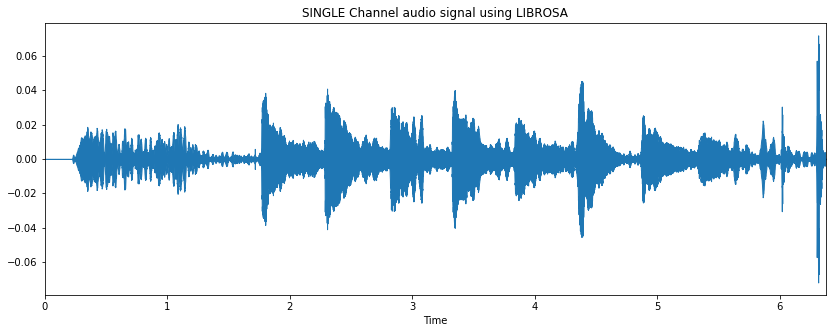

In [20]:
#filename = "theyearningcolab.wav"
filename2 = "/content/garagebandpiano.m4a"
plt.figure(figsize = (14,5))



sound_data2, sample_rate = librosa.load(filename2, sr=None) # Load file to find data and sr(how many times per sec sound sample)
print("sample_rate : ",sample_rate)
print("data : ",sound_data2)

librosa.display.waveplot(sound_data2, sr = sample_rate) # Plotting audio file
plt.title("SINGLE Channel audio signal using LIBROSA")
ipd.Audio(filename2) # play the audio

Signal of tap in frequency domain after performing FFT:


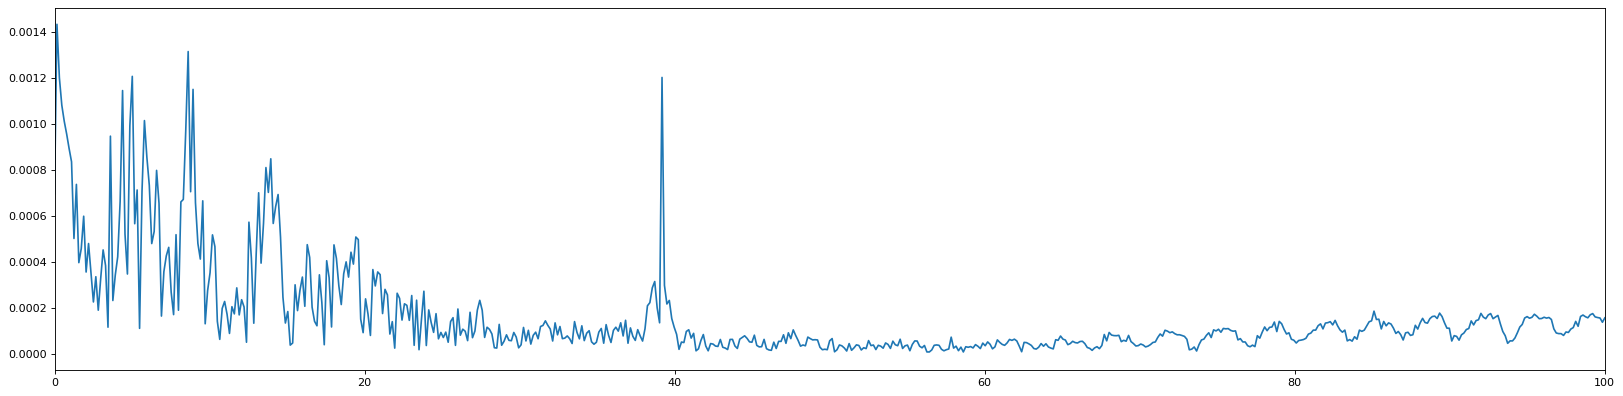

In [21]:
print('Signal of tap in frequency domain after performing FFT:')

figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
s3 = fast_fourier_transform(
    signal=sound_data2, 
    sampling_rate=sample_rate, 
    plot=True, 
    plot_xlim=[0, 100], 
)


#MORE BACKGROUND

https://numpy.org/doc/stable/reference/routines.fft.html#module-numpy.fft


Because the discrete Fourier transform separates its input into components that contribute at discrete frequencies, it has a great number of applications in digital signal processing, e.g., for filtering, and discretized input to the transform is customarily referred to as a signal, which exists in the time domain. The output is called a spectrum or transform and exists in the frequency domain.

#difference between rfft and fft

 For rfft, this symmetry is exploited to compute only the positive frequency terms.

#numpy  version

In [22]:
F=np.fft.fft(np.arange(8))
F

array([28.+0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.+0.j        , -4.-1.65685425j, -4.-4.j        , -4.-9.65685425j])

In [23]:
R=np.fft.rfft(np.arange(8)) #rfft ignores negatives
R

array([28.+0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.+0.j        ])

In [24]:
import matplotlib as plt

In [25]:
from scipy.fft import rfft
from scipy.fft import fft

In [37]:
import socket


socket.socket

from socket import socket
import matplotlib.pyplot as plt 
import numpy as np 


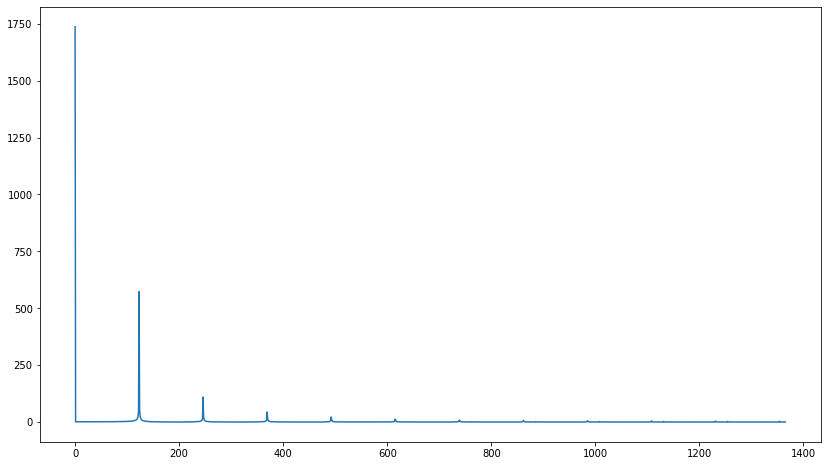

In [38]:
figure(figsize = (14,8))
s=abs(np.sin(np.arange(0,2**13,3)))

sp=rfft(s)

plt.plot(abs(sp))

plt.show()

#do x and y axes above mean frequency and amplitude? @@

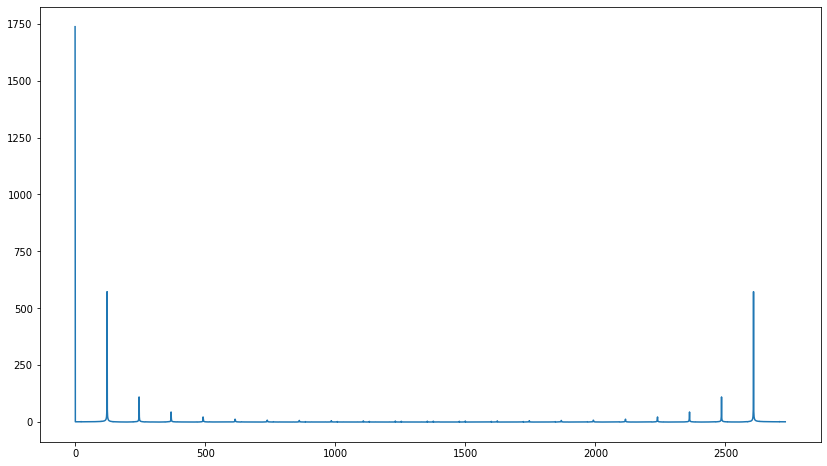

In [39]:
plt.figure(figsize = (14,8))
s=abs(np.sin(np.arange(0,2**13,3)))

sp=fft(s)

plt.plot(abs(sp))

plt.show()

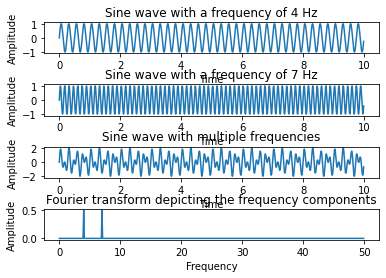

In [40]:
# Python example - Fourier transform using numpy.fft method

import numpy as np

import matplotlib.pyplot as plotter

 

# How many time points are needed i,e., Sampling Frequency

samplingFrequency   = 100;

 

# At what intervals time points are sampled

samplingInterval       = 1 / samplingFrequency;

 

# Begin time period of the signals

beginTime           = 0;

 

# End time period of the signals

endTime             = 10; 

 

# Frequency of the signals

signal1Frequency     = 4;

signal2Frequency     = 7;

 

# Time points

time        = np.arange(beginTime, endTime, samplingInterval);

 

# Create two sine waves

amplitude1 = np.sin(2*np.pi*signal1Frequency*time)

amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

 

# Create subplot

figure, axis = plotter.subplots(4, 1)

plotter.subplots_adjust(hspace=1)

 

# Time domain representation for sine wave 1

axis[0].set_title('Sine wave with a frequency of 4 Hz')

axis[0].plot(time, amplitude1)

axis[0].set_xlabel('Time')

axis[0].set_ylabel('Amplitude')

 

 

# Time domain representation for sine wave 2

axis[1].set_title('Sine wave with a frequency of 7 Hz')

axis[1].plot(time, amplitude2)

axis[1].set_xlabel('Time')

axis[1].set_ylabel('Amplitude')

 

# Add the sine waves

amplitude = amplitude1 + amplitude2

 

# Time domain representation of the resultant sine wave

axis[2].set_title('Sine wave with multiple frequencies')

axis[2].plot(time, amplitude)

axis[2].set_xlabel('Time')

axis[2].set_ylabel('Amplitude')

 

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

 

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation

axis[3].set_title('Fourier transform depicting the frequency components')

 

axis[3].plot(frequencies, abs(fourierTransform))

axis[3].set_xlabel('Frequency')

axis[3].set_ylabel('Amplitude')

 

plotter.show()

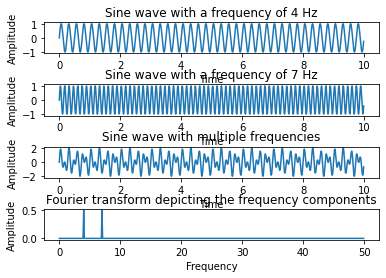

In [43]:
# Python example - Fourier transform using numpy.fft method

import numpy as np

import matplotlib.pyplot as plotter

 

# How many time points are needed i,e., Sampling Frequency

samplingFrequency   = 100;

 

# At what intervals time points are sampled

samplingInterval       = 1 / samplingFrequency;

 

# Begin time period of the signals

beginTime           = 0;

 

# End time period of the signals

endTime             = 10; 

 

# Frequency of the signals

signal1Frequency     = 4;

signal2Frequency     = 7;

 

# Time points

time        = np.arange(beginTime, endTime, samplingInterval);

 

# Create two sine waves

amplitude1 = np.sin(2*np.pi*signal1Frequency*time)

amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

 

# Create subplot

figure, axis = plotter.subplots(4, 1)

plotter.subplots_adjust(hspace=1)

 

# Time domain representation for sine wave 1

axis[0].set_title('Sine wave with a frequency of 4 Hz')

axis[0].plot(time, amplitude1)

axis[0].set_xlabel('Time')

axis[0].set_ylabel('Amplitude')

 

 

# Time domain representation for sine wave 2

axis[1].set_title('Sine wave with a frequency of 7 Hz')

axis[1].plot(time, amplitude2)

axis[1].set_xlabel('Time')

axis[1].set_ylabel('Amplitude')

 

# Add the sine waves

amplitude = amplitude1 + amplitude2

 

# Time domain representation of the resultant sine wave

axis[2].set_title('Sine wave with multiple frequencies')

axis[2].plot(time, amplitude)

axis[2].set_xlabel('Time')

axis[2].set_ylabel('Amplitude')

 

# Frequency domain representation

fourierTransform = np.fft.rfft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

 

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation

axis[3].set_title('Fourier transform depicting the frequency components')

 

axis[3].plot(frequencies, abs(fourierTransform))

axis[3].set_xlabel('Frequency')

axis[3].set_ylabel('Amplitude')

 

plotter.show()

### Understanding deeper: why Fourier transform works?

3Blue1Brown did a brilliant animation to show how signals can be "unwind" to identify its unlying frequencies—highly recommended to check it out if you are keen to find out more.

Video: [But what is the Fourier Transform? A visual introduction.](https://www.youtube.com/watch?v=spUNpyF58BY&vl=en)

In [41]:
#@title 
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/spUNpyF58BY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.8/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Check out this [article](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/) that uses `from smoothie to recipe` illustration to explain how Fourier Transform works.

### Understanding deeper: the code

[SciPy](https://www.scipy.org/) has a function [scipy.fft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html), which computes the discrete Fourier Transform with the efficient Fast Fourier Transform (FFT) algorithm. This algorithm is developed by James W. Cooley and John W. Tukey in 1965, in their paper, [An algorithm for the machine calculation of complex Fourier series](https://www.jstor.org/stable/2003354).

In this tutorial, we perform FFT on the signal by using the [fast_fourier_transform](https://github.com/jinglescode/python-signal-processing/blob/main/splearn/fourier.py). Essentially, we are calling the `scipy.fft` function, `y = fft(signal)`. Here is the code for generating the signal with NumPy, performing FFT with SciPy, and plot both graph with Matplotlib.


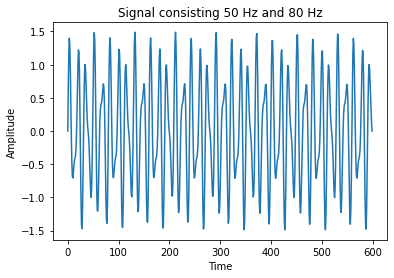

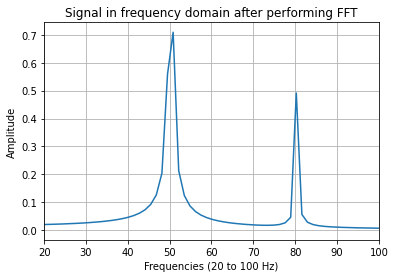

In [42]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

N = 600 # Number of sample points
T = 1.0 / 800.0 # time steps
x = np.linspace(0.0, N*T, N) # x-axis, running number
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) # the signal

# plot the signal
plt.title('Signal consisting 50 Hz and 80 Hz')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(y) 
plt.show()

yf = fft(y) # perform FFT

# plot the graph to show frequency domain
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(20, 100)
plt.title('Signal in frequency domain after performing FFT')
plt.xlabel('Frequencies (20 to 100 Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

`fast_fourier_transform` function is used in this repo and it is taken from [splearn.fourier](https://github.com/jinglescode/python-signal-processing/blob/main/splearn/fourier.py).


#filtering

filter signal: remove unwanted part within certain frequency range

low pass filter: remove signal above cutt off frequency

bandpass filter: combine low and high pass filter. only keep signal in middle of 2 freq

by assigning any absolute frequencies’ FFT amplitude to zero, and returning back to time domain signal, we achieve a very basic high-pass filter in a few step

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

In [52]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)





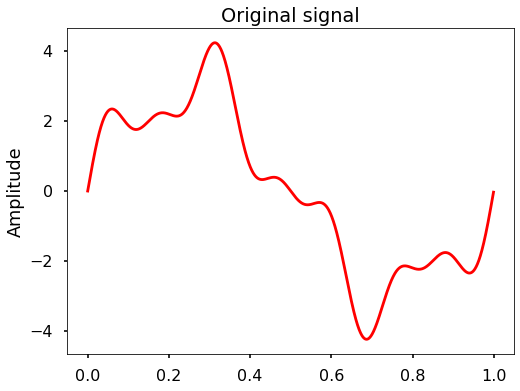

In [53]:
from scipy.fftpack import fftfreq
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Original signal')
plt.show()

##HIGH PASS FILTER only allow higher frequencies to display

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


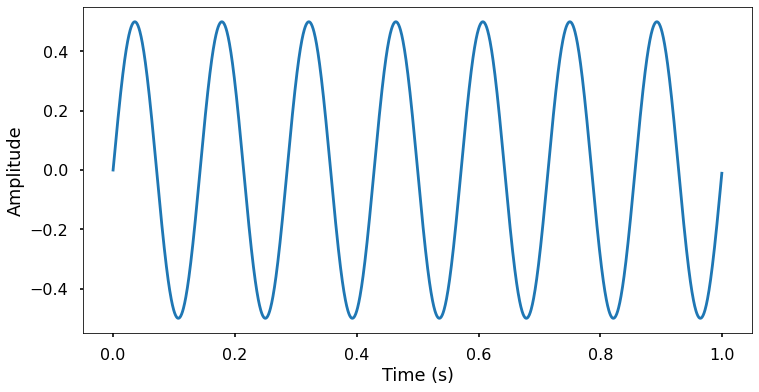

<ipython-input-54-5741366fb283>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, np.abs(sig_fft), 'b', \
<ipython-input-54-5741366fb283>:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, np.abs(sig_fft_filtered), 'b', \


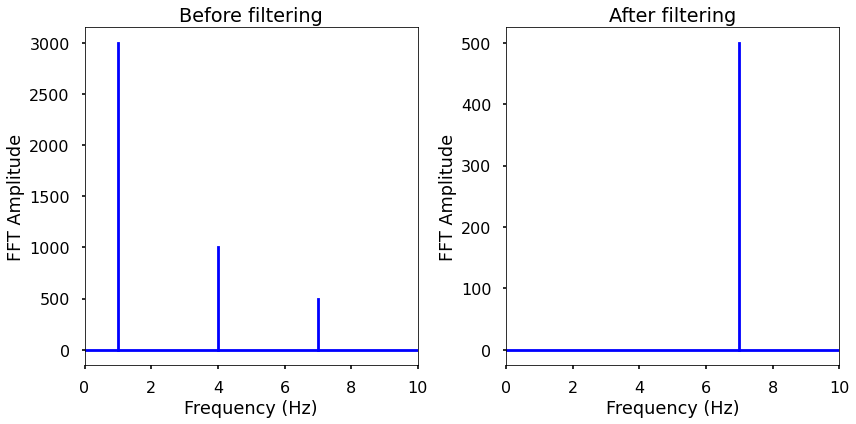

In [54]:
from numpy.fft import fft, ifft
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

##LOW PASS FILTER only allow lower frequencies (on x axis) to display

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


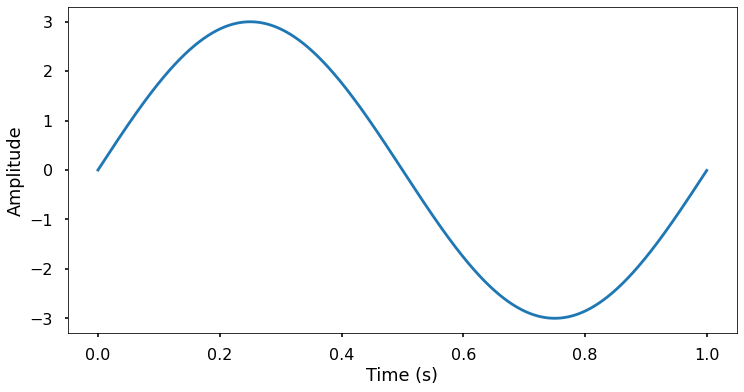

<ipython-input-56-336b37ee3157>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, np.abs(sig_fft), 'b', \
<ipython-input-56-336b37ee3157>:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, np.abs(sig_fft_filtered), 'b', \


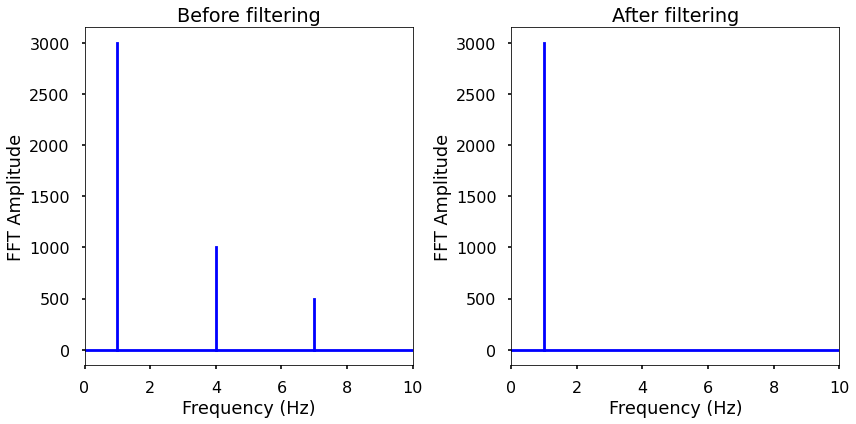

In [56]:
from numpy.fft import fft, ifft
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 3

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) > cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

##bandPASS FILTER only allow in between frequencies (on x axis) to display

#error below@@

In [61]:
from numpy.fft import fft, ifft
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off_high = 6
cut_off_low = 3

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) > cut_off_low and np.abs(freq)  <cut_off_high).any()] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

SyntaxError: ignored